In [1]:
import math 
import cmath 
import numpy as np 
import matplotlib.pyplot as plt 

## Question 1 

In [2]:
class quad: 
    def __init__(self , a , b ,c ):
        if( a == 0 ): 
            raise ValueError("a should not be zero.")
        self.a = a 
        self.b = b 
        self.c = c 
    def value( self , x ):
        return self.a*(x**2) + self.b*(x) + self.c
    def table( self , l , r,  n ):
        if( r < l ):
            raise ValueError("l should be smaller than r.")
        x = np.linspace( l , r , n )
        return x , self.value( x )
    def roots( self ):
        const = self.b**2 - 4*self.a*self.c  
        if( const >=0 ):
            const = math.sqrt( const )
        else: 
            const = cmath.sqrt( const )
        return ( -self.b + const )/(2*self.a) , ( -self.b - const )/(2*self.a)

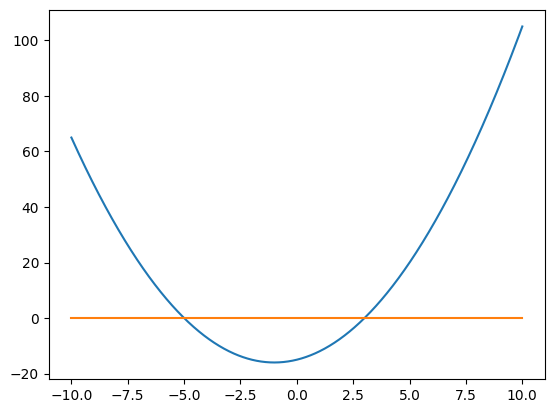

roots  (3.0, -5.0)


In [3]:
q1 = quad( 1 , 2 , -15 )
x , y = q1.table( -10 , 10 , 1000 )
plt.plot( x , y )
plt.plot( x, np.zeros(x.size))
plt.show()
print( 'roots ' , q1.roots())

In [4]:
q2 = quad( 3, -4 , 10 )
x , y = q2.table( -1 , 1 , 10 )
print( f'x = {x} \n and \n y = {y}')
print( 'roots ' , q2.roots())

x = [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ] 
 and 
 y = [17.         14.92592593 13.14814815 11.66666667 10.48148148  9.59259259
  9.          8.7037037   8.7037037   9.        ]
roots  ((0.6666666666666666+1.6996731711975948j), (0.6666666666666666-1.6996731711975948j))


## Question 3 

In [5]:
class poly:
    def __init__(self, coeff ):
        if not isinstance(coeff, np.ndarray):
            raise ValueError("coeff must be a NumPy array")
        if not issubclass(coeff.dtype.type, np.floating):
            raise ValueError("coeff elements must be of type float")
        self.coeff = coeff 
        self.power = self.coeff.size - 1 
    def set_coeff( self , new_coeff ):
        if not isinstance(new_coeff, np.ndarray):
            raise ValueError("coeff must be a NumPy array")
        if not issubclass(new_coeff.dtype.type, np.floating):
            raise ValueError("coeff elements must be of type float")
        self.coeff = new_coeff.astype(float) 
        self.power = self.coeff.size - 1 
    def __add__( self , other ):
        if not isinstance( other , poly ):
            raise ValueError("Cannot add two different object types.")
        result = np.zeros( max( self.coeff.size , other.coeff.size ))
        result[:self.coeff.size] += self.coeff 
        result[:other.coeff.size] += other.coeff 
        return poly(result)
    def __call__( self , x ):
        z = np.array([ x**i for i in range( 0 , self.power + 1 )])
        return np.sum( self.coeff * z )
    def __mul__( self , other ): 
        if not isinstance( other , poly ):
            raise ValueError("Cannot add two different object types.")
        result = np.zeros( self.power + other.power + 1  )
        for i in range( 0 , self.power + 1 ):
            for j in range( 0 , other.power + 1 ):
                result[ i + j ] += self.coeff[i]*other.coeff[j]
        return poly( result )

In [6]:
p1 = poly( np.array([1.0,-1.0]))
print( f'p1 : {p1.coeff}' )
print( [ p1(i) for i in range( 0 ,5 )])
p2 = poly( np.array([0,1,0,0,-6,-1] , dtype = float ) )
print( f'p2 : {p2.coeff}')
print( [ p2(i) for i in range( 0 ,5 )])
p3 = p1 + p2 
print( f'p3 : {p3.coeff}')
print( [ p3(i) for i in range( 0 ,5 )])
p4 = p1*p2 
print( f'p3 : {p4.coeff}')
print( [ p4(i) for i in range( 0 ,5 )])

p1 : [ 1. -1.]
[1.0, 0.0, -1.0, -2.0, -3.0]
p2 : [ 0.  1.  0.  0. -6. -1.]
[0.0, -6.0, -126.0, -726.0, -2556.0]
p3 : [ 1.  0.  0.  0. -6. -1.]
[1.0, -6.0, -127.0, -728.0, -2559.0]
p3 : [ 0.  1. -1.  0. -6.  5.  1.]
[0.0, 0.0, 126.0, 1452.0, 7668.0]


In [7]:
def mod( a ): 
    if a > 0 : 
        return '+ '
    else: 
        return '- '

## Question 4 

In [8]:
class polynomial: 
    def __init__(self, coeff ):
        self.coeff = coeff 
    def __add__( self , other ):
        result = {}
        for key, value in self.coeff.items(): 
            if key in result:
                result[key] += value 
            else: 
                result[key] = value 
        for key, value in other.coeff.items(): 
            if key in result:
                result[key] += value 
            else: 
                result[key] = value 
        return polynomial( result )
    def __sub__( self , other ):
        result = {}
        for key, value in self.coeff.items(): 
            if key in result:
                result[key] += value 
            else: 
                result[key] = value 
        for key, value in other.coeff.items(): 
            if key in result:
                result[key] -= value 
            else: 
                result[key] = -value 
        return polynomial( result )
    def __str__(self) : 
        result = ''
        for key , value in self.coeff.items():
            result = result + mod(value) + str(abs(value)) + "x^" + str(key) + " "
        return result 

In [9]:
p1_dict = { 4 : 1 , 2 : -3 , 0 : 3 }
p2_dict = { 9 : 11 , 7 : 5 , 3 : 4 , 1 : -2 }
p1 = polynomial( p1_dict)
p2 = polynomial( p2_dict )
print( p1 )
print( p2 )
print( p1 + p2 )
print( p1 - p2 )

+ 1x^4 - 3x^2 + 3x^0 
+ 11x^9 + 5x^7 + 4x^3 - 2x^1 
+ 1x^4 - 3x^2 + 3x^0 + 11x^9 + 5x^7 + 4x^3 - 2x^1 
+ 1x^4 - 3x^2 + 3x^0 - 11x^9 - 5x^7 - 4x^3 + 2x^1 
